# Page View Time Series Visualizer

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("fcc_forum_pageviews.csv", parse_dates = ['date']).set_index('date', drop = False)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df.head()

,date,value,year,month,day
date,,,,,
2016-05-09,2016-05-09,1201,2016,May,9
2016-05-10,2016-05-10,2329,2016,May,10
2016-05-11,2016-05-11,1716,2016,May,11
2016-05-12,2016-05-12,10539,2016,May,12
2016-05-13,2016-05-13,6933,2016,May,13


In [3]:
df.shape

(1304, 5)

### Cleaning data

filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset

In [4]:
top_tresh = df['value'].quantile(0.975)
bot_tresh = df['value'].quantile(0.025)
df = df[(df['value'] < top_tresh) & (df['value'] > bot_tresh)]
df.shape

(1238, 5)

Create a line chart

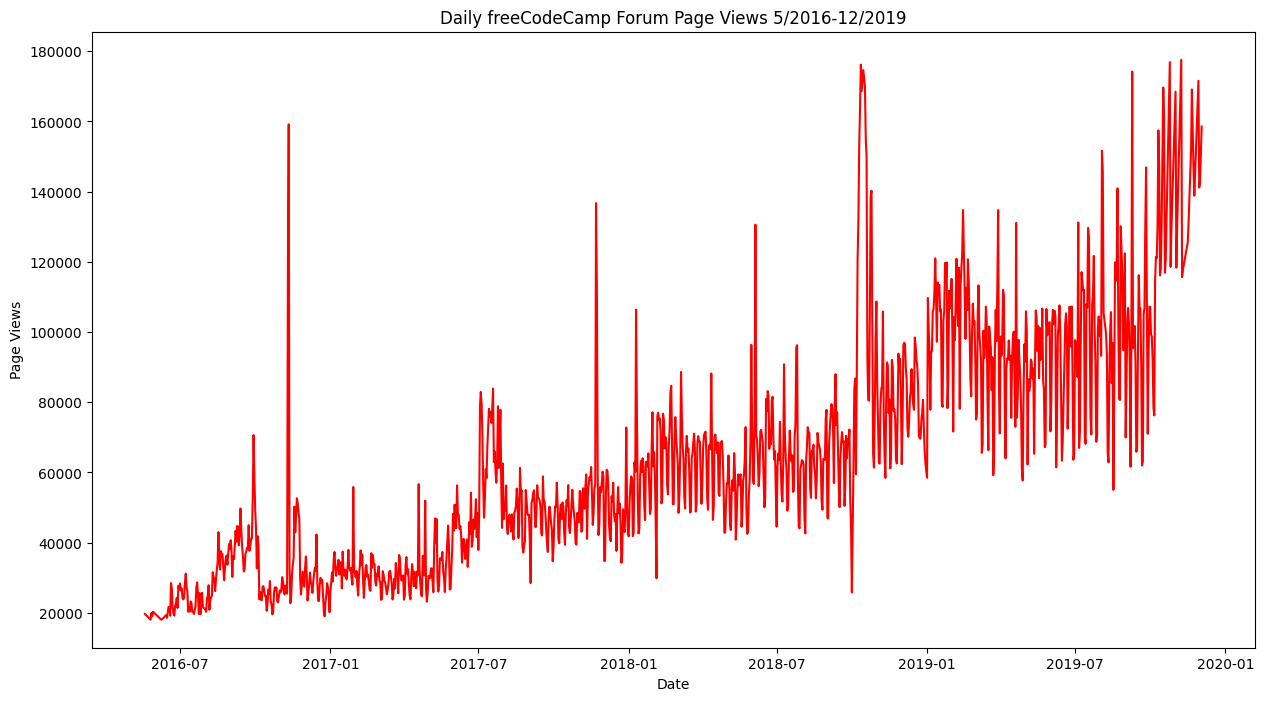

In [5]:
plt.figure(figsize=(15,8))
plt.plot(df['date'],df['value'], color = 'r')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.show()

Create a bar chart that shows the average daily page views for each month grouped by year.

<AxesSubplot: xlabel='Years', ylabel='Average Views'>

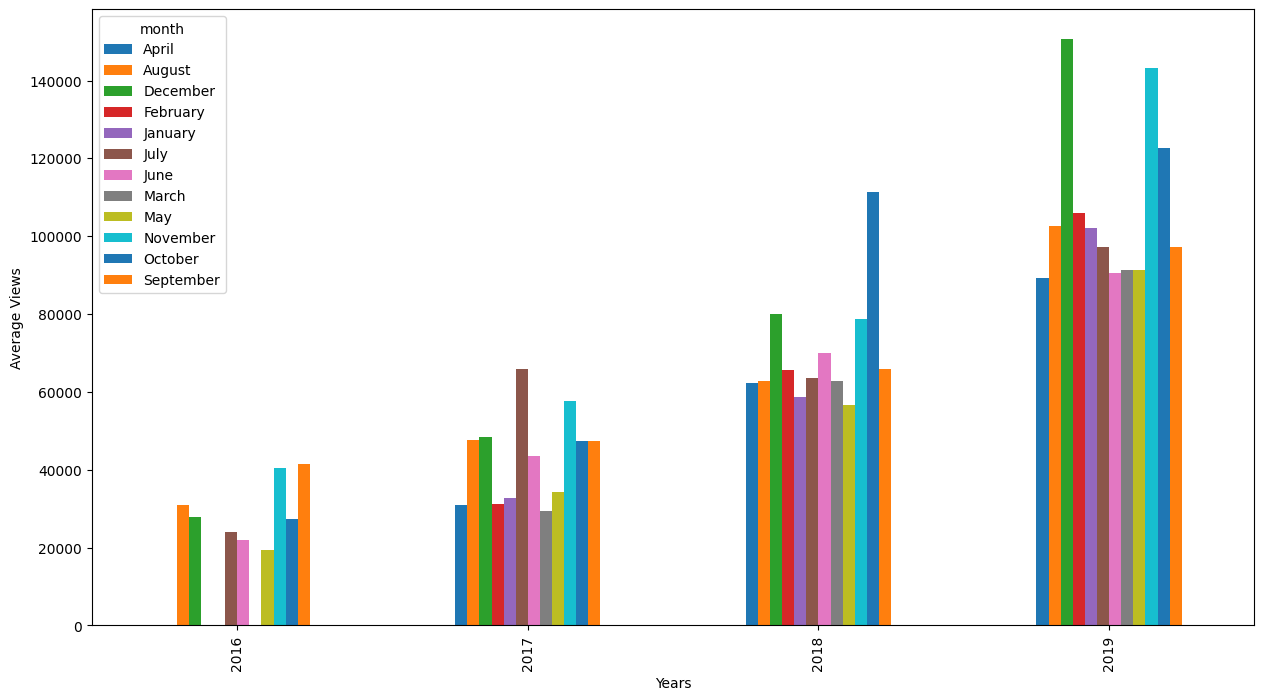

In [6]:
# Creating a dataframe that is grouped by year then months
grouped_df = df.groupby(['year','month'],as_index = False).mean('value')
# Converting the dataframe to long format
df_bar = grouped_df.pivot(index = 'year', columns = 'month', values = 'value')
# Plotting
df_bar.plot(kind='bar',
            figsize = (15,8),
            legend = 'Months',
           xlabel = 'Years',
           ylabel = 'Average Views')

Create box plots that show how the values are distributed within a given year or month and how it compares over time.

In [9]:
sorted_df = df.copy()
sorted_df['months'] = sorted_df['date'].dt.month
sorted_df = sorted_df.sort_values('months')
sorted_df.head()

,date,value,year,month,day,months
date,,,,,,
2017-01-06,2017-01-06,37353,2017,January,6,1
2019-01-06,2019-01-06,94108,2019,January,6,1
2019-01-05,2019-01-05,77897,2019,January,5,1
2019-01-04,2019-01-04,94514,2019,January,4,1
2019-01-03,2019-01-03,100710,2019,January,3,1


[Text(0.5, 0, 'Months'),
 Text(0, 0.5, 'Page Views'),
 Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')]

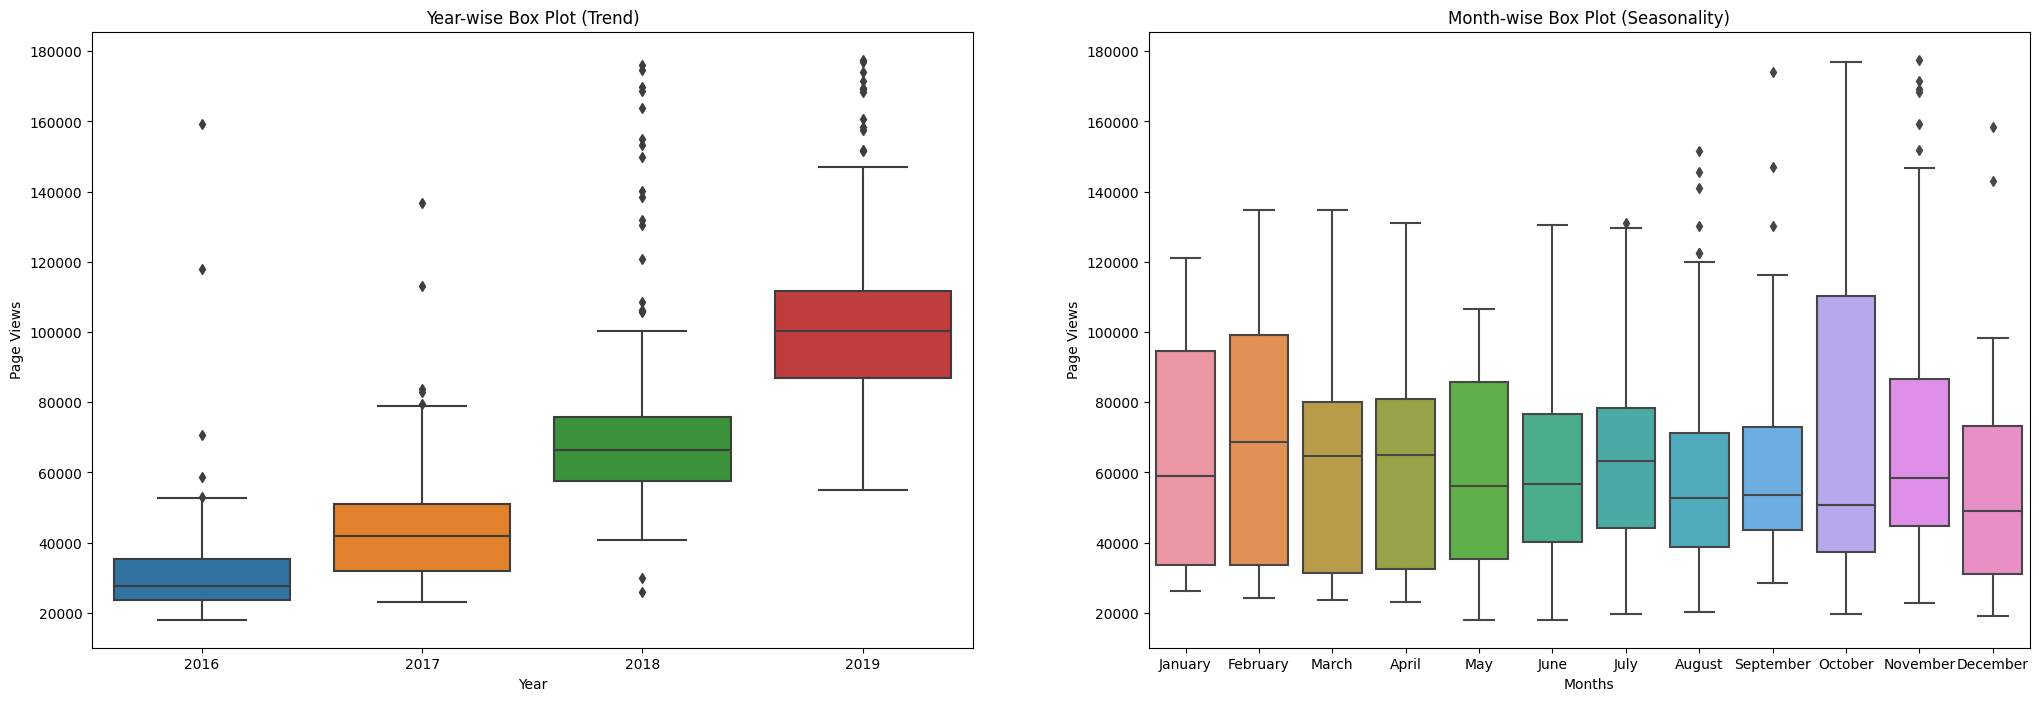

In [10]:
# Creating the figure
plt.figure(figsize = (25,8))

# Dividing the figure into 2 and drawing the first plot
plt.subplot(121)
sns.boxplot(df, x = 'year', y = 'value').set(xlabel = 'Year', ylabel = 'Page Views',title = 'Year-wise Box Plot (Trend)')

# Drawing the second plot
plt.subplot(122)
sns.boxplot(sorted_df, x = 'month', y = 'value').set(xlabel = 'Months', ylabel = 'Page Views',title = 'Month-wise Box Plot (Seasonality)')